In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("price.csv")

In [3]:

# Preprocess data
encoders = {}
for column in ['Commodity', 'reported month']:
    encoders[column] = LabelEncoder()
    df[column] = encoders[column].fit_transform(df[column])

In [4]:
# Split data into features and target
X = df[['Commodity', 'reported month', 'reported year']]
y = df['modal price']

In [5]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:

# Save the model
joblib.dump(model, 'regression_model.pkl')

['regression_model.pkl']

In [8]:
# Save label encoders for each string column
for column, encoder in encoders.items():
    joblib.dump(encoder, f'{column}_label_encoder.pkl')

In [9]:
# Predict on test set
y_pred = model.predict(X_test)

In [10]:
# Calculate and print accuracy score
accuracy = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {accuracy}")
print(f"Mean squared Error: {mse}")
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Absolute Error: 713.3972222222221
Mean squared Error: 2038298.2956481483
Root Mean Squared Error: 1427.6898457466693
R^2 Score: 0.8979608362531182


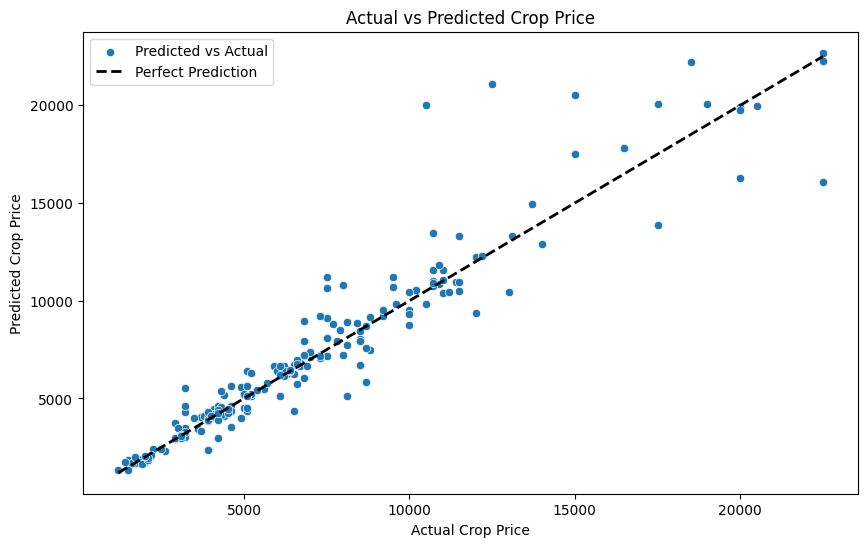

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Crop Price')
plt.ylabel('Predicted Crop Price')
plt.title('Actual vs Predicted Crop Price')
plt.legend()
plt.show()

Predicted price for rice in may 2022: 4369.0
Mean Absolute Error: 713.3972222222221
Mean Squared Error: 2038298.2956481483
Root Mean Squared Error: 1427.6898457466693
R² Score: 0.8979608362531182


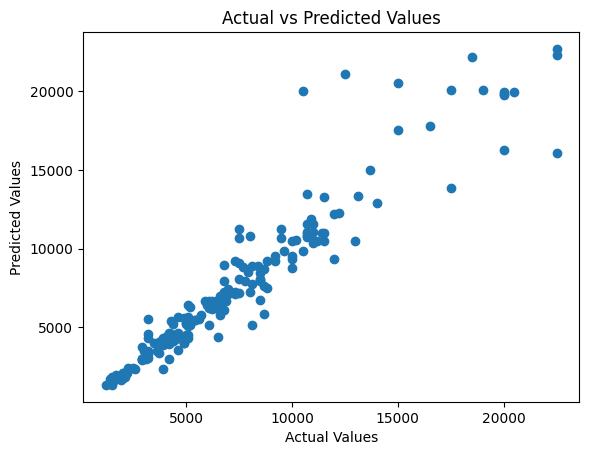

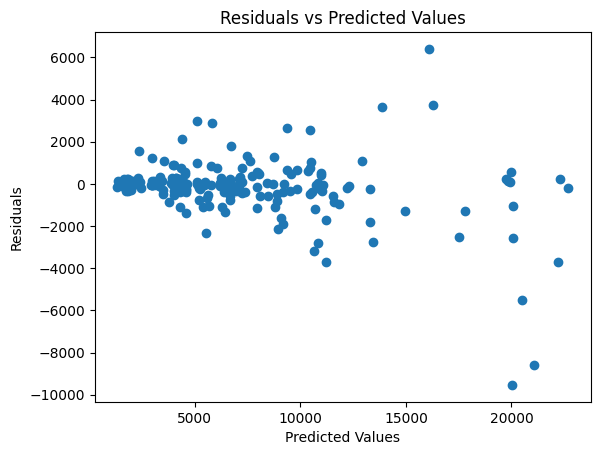

Baseline MAE: 3369.403935185185
Baseline MSE: 19980739.877507716
Baseline R²: -0.000254963906815453
Cross-Validation R² Scores: [ 3.03265839e-02  2.56927348e-02  2.13780718e-01 -1.78105803e-01
 -5.81912860e+01]
Mean Cross-Validation R² Score: -11.619918358426279


In [12]:
#Testing
import numpy as np
import joblib
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 


def preprocess_input(commodity, month, year, commodity_encoder, month_encoder):
    commodity = commodity_encoder.transform([commodity])[0]
    month = month_encoder.transform([month])[0] 
    return np.array([[commodity, month, year]])
def predict_price(model, input_data):
    return model.predict(input_data)[0]

# Load the model and encoders
model = joblib.load('regression_model.pkl')


# Load the label encoders
commodity_encoder = joblib.load('commodity_label_encoder.pkl')
month_encoder = joblib.load('reported_month_label_encoder.pkl')
##print(commodity_encoder.classes_)
##print(month_encoder.classes_)

# Example usage
commodity = 'rice'
month = 'may'
year = 2022

input_data = preprocess_input(commodity, month, year, commodity_encoder, month_encoder)
predicted_price = predict_price(model, input_data)
print(f"Predicted price for {commodity} in {month} {year}: {predicted_price}")
# Import necessary libraries
 # Example model

# Assuming X_train, X_test, y_train, y_test are already defined
# Assuming you have already trained your model and have y_pred from model predictions

# Evaluate the RandomForestRegressor model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Visualize Actual vs Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Visualize Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Baseline Model
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

dummy_mae = mean_absolute_error(y_test, y_dummy_pred)
dummy_mse = mean_squared_error(y_test, y_dummy_pred)
dummy_r2 = r2_score(y_test, y_dummy_pred)

print(f"Baseline MAE: {dummy_mae}")
print(f"Baseline MSE: {dummy_mse}")
print(f"Baseline R²: {dummy_r2}")

# Cross-Validation
model = RandomForestRegressor()  # Replace with your actual model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")
